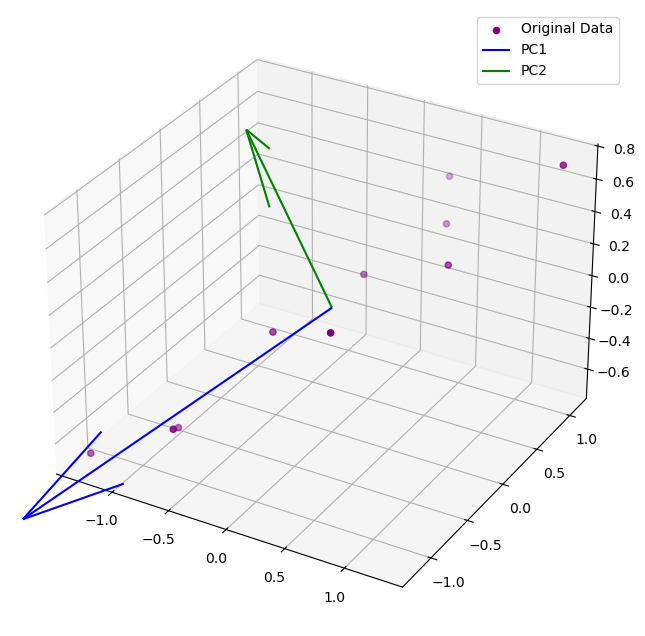

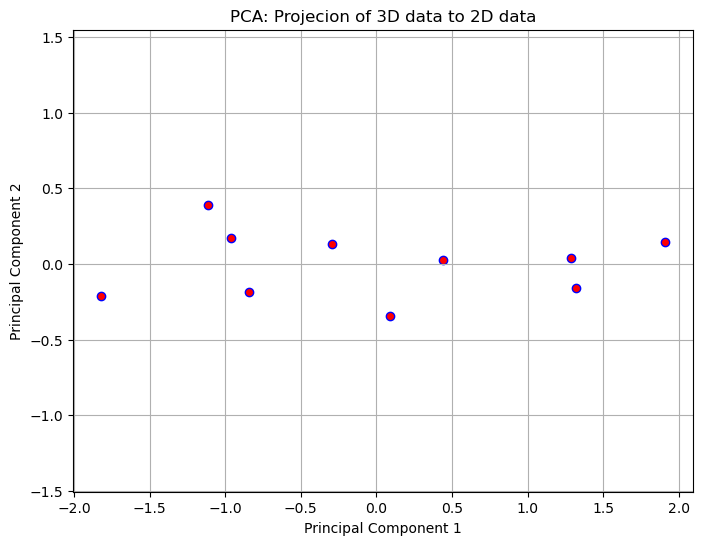

In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a 3D dataset (10 Points)
X = np.array([[2.5, 2.4, 1.2],
              [0.5, 0.7, 0.3],
              [2.2, 2.9, 1.5],
              [1.9, 2.2, 1.1],
              [3.1, 3.0, 1.7],
              [2.3, 2.7, 1.3],
              [2.0, 1.6, 1.0],
              [1.0, 1.1, 0.4],
              [1.5, 1.6, 0.9],
              [1.1, 0.9, 0.5]])

# Step 2: Center the data
X_meaned = X - np.mean(X, axis=0)

# Step 3: Covariance Matrix
cov_mat = np.cov(X_meaned, rowvar = False)

# Step 4: Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)

# Step 5: Sort eigenvectors (descending)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues = eigenvalues[sorted_indices]

# Step 6: Plot the original data vs PC1 and PC2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_meaned[:, 0], X_meaned[:, 1], X_meaned[:, 2], c='purple', label="Original Data")
for i in range(2):
    vec = eigenvectors[:, i]
    # Draw arrows on a 3D plot to visualize direction and magnitues of the eigenvectors
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], length=2.5, color='blue' if i==0 else 'green', normalize=True, label=f'PC{i+1}')
    ax.legend()

# Step 7: Project onto two components (3D to 2D)
k = 2
W = eigenvectors[:, :k]
X_reduced = X_meaned @ W

# Step 8: Plot reduced 2D Data
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='red', edgecolor='blue')
plt.title("PCA: Projecion of 3D data to 2D data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.axis('equal')
plt.show()